# **Task 4: ANOVA – Estimating Type II Error**

## **Problem Description**
We wish to estimate how often **one-way ANOVA** fails to reject the null hypothesis (i.e., commits a **type II error**) under the following conditions:
1. We run **10,000 simulations**.
2. In each simulation, we generate three samples, each with:
   - **100 observations**,
   - **Mean values** of \(4.9\), \(5.0\), and \(5.1\),
   - A **standard deviation** of \(0.1\).
3. We then perform a **one-way ANOVA** on these three samples.
4. If p_value >= 0.05, we fail to reject H0, we count it as a **type II error** because the means are truly different.

Finally, we display:
- The total number of **simulations**,
- The number of **type II errors**,
- And the **type II error rate** (as a percentage),
- Along with a **histogram** of all observed p-values to illustrate how often ANOVA strongly rejects or fails to reject \(H_0\).

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

In [53]:
# Keep getting 0 Type II errors and struggling so adding in random seed; but I think this is expected?
np.random.seed(42)

# 1. Define simulation parameters
num_simulations = 10_000
no_type_ii = 0
# For graphing: store p-values to illustrate distribution
all_p_values = []

In [58]:
# 2. Run the simulation multiple times
for _ in range(num_simulations):
    # Generate three samples:
    # Each has 100 observations, standard deviation = 0.1,
    # and slightly different means (4.9, 5.0, 5.1).
    sample1 = np.random.normal(loc=4.9, scale=0.1, size=100)
    sample2 = np.random.normal(loc=5.0, scale=0.1, size=100)
    sample3 = np.random.normal(loc=5.1, scale=0.1, size=100)
    
    # Perform one-way ANOVA using SciPy's f_oneway
    f_stat, p_value = f_oneway(sample1, sample2, sample3)
    
    # Add p_value to our list so we can examine its distribution later
    all_p_values.append(p_value)
    
    # If p_value >= 0.05, we fail to reject H0 despite the real difference
    if p_value >= 0.05:
        no_type_ii += 1

In [55]:
# 3. Calculate the proportion of Type II errors
type_ii_rate = (no_type_ii / num_simulations) * 100

print("Number of simulations:", num_simulations)
print("Number of Type II errors:", no_type_ii)
print(f"Estimated Type II Error Rate: {type_ii_rate:.2f}%")

Number of simulations: 10000
Number of Type II errors: 0
Estimated Type II Error Rate: 0.00%


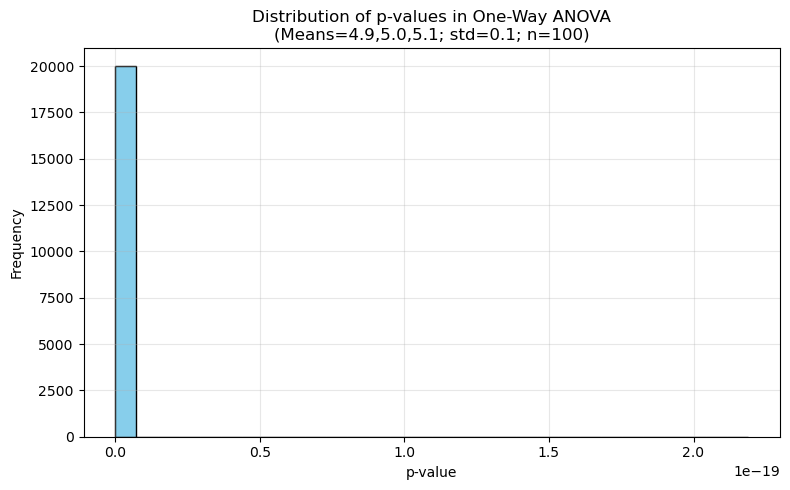

In [59]:
# 4. Plot the distribution of p-values
plt.figure(figsize=(8, 5))
plt.hist(all_p_values, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of p-values in One-Way ANOVA\n(Means=4.9,5.0,5.1; std=0.1; n=100)")
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### Discussion

1. **Why Might We See 0 Type II Errors?**  
   - The difference between 4.9 and 5.1 is 0.2, while the standard deviation is only 0.1, leading to a fairly **large effect size** (≈2.0).
   - With **100** observations in each group, ANOVA often has **sufficient power** to detect that difference in virtually all runs.
   

2. **Interpretation of the Histogram**  
   - Most p-values will concentrate well below 0.05 if the test consistently detects the difference.  
   - In rare cases (if any), we might see p-values above 0.05, signifying a type II error.
   

3. **Implication**  
   - In practice, effect sizes may be smaller, or variability higher, which would increase the chance of missing a true difference.


4. **If We Wanted Type II Errors**  
   - We could reduce the effect size by bringing the group means closer (e.g. 4.95, 5.0, 5.05) or increase the standard deviation (e.g. 0.2 or 0.3).  
   - Either change would make it harder to detect the difference, thus **increasing** the likelihood of type II errors.
   

5. **Practical Takeaway**  
   - Seeing **0%** type II errors indicates my test is highly capable
   - Adjusting the means or standard deviations can illustrate how ANOVA behaves with a weaker effect or more variation.

### Conclusion
Under the specific setup of:
  - **Three groups** with means 4.9, 5.0, 5.1,
  - **Standard deviation** = 0.1,
  - **Sample size** = 100 per group,
  
the o**ne-way ANOVA** finds a **highly significant** difference. As a result, the **type II error rate** (the proportion of false negatives) is **very low (0%)** across 10,000 simulations. This demonstrates how a substantial effect size and adequate sample size can drastically reduce the probability of missing a genuine difference.

### References

1. Fisher, R. A. (1925). *Statistical Methods for Research Workers.* Oliver & Boyd.  
2. [SciPy `f_oneway` Documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)  